# CAP 6618 - Machine Learning for Computer Vision

Christian Garbin
Spring 2019

# Programming Project 3
See guidelines on Canvas for details.

# Step 1: Setup

First, make sure that you have installed Keras on your computer.

In [1]:
# Code from https://github.com/keras-team/keras 

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K

/var/web_services/galaxy/jupyter_conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Step 1a: Auxiliary functions

Some data manipulation and visualization functions.

Visualize Keras training accuracy and loss, given a `History` object collected from calling `fit()`.

In [3]:
# From https://keras.io/visualization/

def plot_keras_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Step 2: Load (and split) the MNIST dataset

In [4]:
# Code from https://github.com/keras-team/keras 

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


# Step 3: Prepare the data

In [5]:
# Code from https://github.com/keras-team/keras 

num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Step 4: Build the first model (deep MLP) in Keras  

In [6]:
# Code from https://github.com/keras-team/keras 

model1 = Sequential()
model1.add(Dense(512, activation='relu', input_shape=(784,)))
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Step 5: Train the first network  

12 epochs, mini-batch size = 128 <br/>
This will take ~10 seconds per epoch on a CPU.

In [7]:
# Code from https://github.com/keras-team/keras 

batch_size = 128
epochs = 12
history1 = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 69us/step - loss: 0.2463 - acc: 0.9237 - val_loss: 0.1137 - val_acc: 0.9648
Epoch 2/12
60000/60000 [==============================] - 2s 32us/step - loss: 0.1027 - acc: 0.9684 - val_loss: 0.0752 - val_acc: 0.9778
Epoch 3/12
60000/60000 [==============================] - 2s 32us/step - loss: 0.0738 - acc: 0.9777 - val_loss: 0.0747 - val_acc: 0.9787
Epoch 4/12
60000/60000 [==============================] - 2s 33us/step - loss: 0.0597 - acc: 0.9820 - val_loss: 0.0753 - val_acc: 0.9788
Epoch 5/12
60000/60000 [==============================] - 2s 31us/step - loss: 0.0513 - acc: 0.9846 - val_loss: 0.0751 - val_acc: 0.9801
Epoch 6/12
60000/60000 [==============================] - 2s 33us/step - loss: 0.0414 - acc: 0.9878 - val_loss: 0.0765 - val_acc: 0.9814
Epoch 7/12
60000/60000 [==============================] - 2s 33us/step - loss: 0.0396 - acc: 0.9883 - val_loss: 0.0838 - val_acc

# Step 6: Evaluate performance on test set

In [8]:
score1 = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.08333979719318782
Test accuracy: 0.9838


# Step 7: Build the second model (CNN) in Keras  

In [9]:
# Code from https://github.com/keras-team/keras 

# Re-load and re-shape the dataset

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Create the model for this section.

In [10]:
# To print the model only once
first_time = True

def get_model():
    global first_time

    # Code from https://github.com/keras-team/keras 
    num_classes = 10

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    if first_time:
        model.summary()
        first_time = False
        
    return model

Train the mode, validate on test data and display some pieces of data to anaylize it.

In [11]:
def train_validate_analyze(batch_size, epochs):
    # Always create a new model. Calling fit() twice on a model resumes training, so
    # to compare configurations we need a new model, to ensure it starts from scratch.
    model = get_model()

    history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
    
    score = model.evaluate(x_test, y_test, verbose=1)
    print('Test loss:', score[0]) 
    print('Test accuracy:', score[1])
    
    plot_keras_history(history)

# Step 8: Train, validate and analyze the second network  

12 epochs, mini-batch size = 128 <br/>
<b>WARNING:</b> This will take 3-5 minutes per epoch on a CPU! You might want to reduce the value of varibale 'epochs' before training the first time and/or save the resulting model after the training is over.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

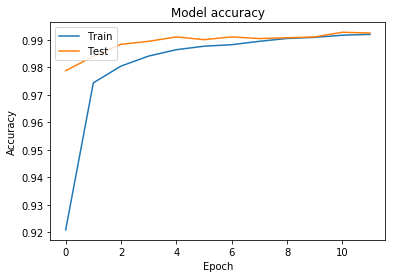

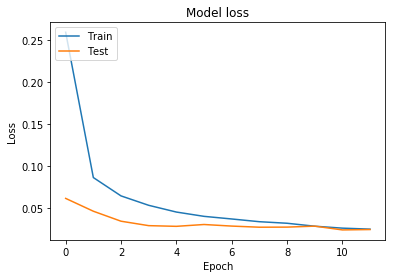

In [12]:
train_validate_analyze(128, 12)

# Step 9: Fine-tune the network

The graphs above show that training and test accuracy are still convering. That is a sign the network is not overfitting and we could train it for longer.

Therefore, as a first attempt to improve the accuracy we will train it for more epochs.

## Step 9a: Train longer to find where it overfits

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.2677 - acc: 0.9171 - val_loss: 0.0551 - val_acc: 0.9834
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0889 - acc: 0.9732 - val_loss: 0.0415 - val_acc: 0.9870
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0665 - acc: 0.9808 - val_loss: 0.0359 - val_acc: 0.9870
Epoch 4/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0545 - acc: 0.9834 - val_loss: 0.0330 - val_acc: 0.9878
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0490 - acc: 0.9856 - val_loss: 0.0299 - val_acc: 0.9896
Epoch 6/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0417 - acc: 0.9873 - val_loss: 0.0284 - val_acc: 0.9899
Epoch 7/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0400 - acc: 0.9882 - val_loss: 0.0256 - val_acc

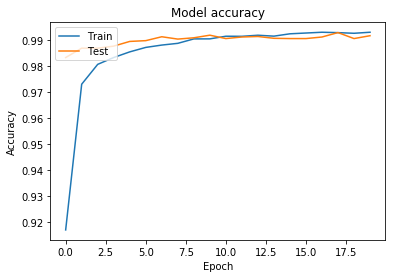

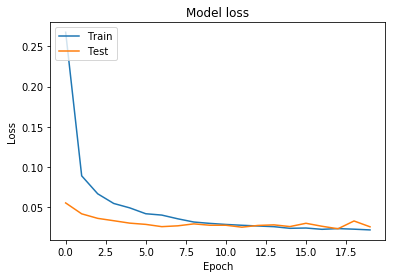

In [13]:
train_validate_analyze(128, epochs=20)

At around epoch 11 (the graph starts at zero) the network starts to overfit.

## Step 9b: Train up to the best epoch

Now we will train up to that epoch.

Train on 60000 samples, validate on 10000 samples
Epoch 1/11
60000/60000 [==============================] - 5s 77us/step - loss: 0.2656 - acc: 0.9186 - val_loss: 0.0587 - val_acc: 0.9805
Epoch 2/11
60000/60000 [==============================] - 4s 72us/step - loss: 0.0869 - acc: 0.9738 - val_loss: 0.0378 - val_acc: 0.9870
Epoch 3/11
60000/60000 [==============================] - 4s 73us/step - loss: 0.0674 - acc: 0.9801 - val_loss: 0.0384 - val_acc: 0.9876
Epoch 4/11
60000/60000 [==============================] - 4s 73us/step - loss: 0.0537 - acc: 0.9841 - val_loss: 0.0327 - val_acc: 0.9894
Epoch 5/11
60000/60000 [==============================] - 4s 73us/step - loss: 0.0470 - acc: 0.9855 - val_loss: 0.0309 - val_acc: 0.9893
Epoch 6/11
60000/60000 [==============================] - 4s 73us/step - loss: 0.0408 - acc: 0.9876 - val_loss: 0.0286 - val_acc: 0.9905
Epoch 7/11
60000/60000 [==============================] - 4s 72us/step - loss: 0.0380 - acc: 0.9884 - val_loss: 0.0277 - val_acc

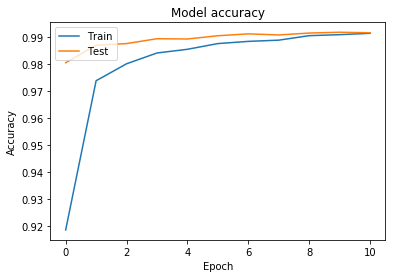

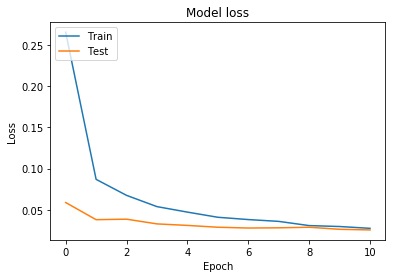

In [14]:
train_validate_analyze(128, epochs=11)

A bit worse than the overfitted network, but not we reached the point of where small training tweaks affect only the third significant digit in the accuracy metric.

It looks like we reached the "good enough" point for this network architecture.

From now on we will use this network as a baseline and run other experiments. The baseline accuracy is then is between 99.3% and 99.1%.

## What is out there

According to [this site](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html), the best MNIST accuracy has 0.21% error rate, i.e 99.79% accuracy.

# Step 10: Build your best solution (and explain each step) 

## Use a separate notebook